<img src="poet.jpeg" alt="Drawing" style="width: 400px;"/> 
<h2><center>Arabic Poetry Dataset

# Import Libraries

In [1]:
#Python libraries
#Classic,data manipulation 
import re
import nltk
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,accuracy_score

# Plots
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import markovify
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.stem.isri import ISRIStemmer
from pyarabic.araby import strip_harakat
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from ar_wordcloud import ArabicWordCloud

import pyarabic.arabrepr
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # don't skip this
from tashaphyne.stemming import ArabicLightStemmer
import seaborn as sns
import pyarabic.araby as araby
import pyarabic.number as number
from nltk.corpus import stopwords
import string 

from tqdm import tqdm
import pyarabic.araby as araby

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

# Read DataSet

In [2]:
df= pd.read_csv('Arabic Poem Comprehensive Dataset (APCD).csv')

In [3]:
df=df.iloc[:100000,:]

In [4]:
df.head()

,العصر,الشاعر,الديوان,القافية,البحر,الشطر الايسر,الشطر الايمن,البيت
0,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَأَن تَجمَعا شَملي وَتَنتَظِرا غَدا,خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا,خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا وَأَن...
1,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَلا سُرعَتي يَوماً بِسابِقَةِ الرَدى,فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ,فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ وَلا سُ...
2,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَتَستَوجِبا مَنّاً عَلَيَّ وَتُحمَدا,وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً,وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً وَتَ...
3,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,تُؤامِرُني سِرّاً لِأَصرِمَ مَرثَدا,لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ,لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ تُؤامِرُ...
4,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَأَفرَعَ في لَومي مِراراً وَأَصعَدا,وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ,وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ وَأَفر...


# EDA 1-1: Features viualizing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   العصر         100000 non-null  object
 1   الشاعر        100000 non-null  object
 2   الديوان       100000 non-null  object
 3   القافية       100000 non-null  object
 4   البحر         100000 non-null  object
 5   الشطر الايسر  99119 non-null   object
 6   الشطر الايمن  100000 non-null  object
 7   البيت         100000 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [6]:
df.columns

Index(['العصر', 'الشاعر', 'الديوان', 'القافية', 'البحر', 'الشطر الايسر',
       'الشطر الايمن', 'البيت'],
      dtype='object')

In [7]:
Most_Generation = df['العصر'].value_counts().sort_values(ascending=False ).to_frame().reset_index()
Most_Generation

,index,العصر
0,العباسي,48469
1,الأموي,23125
2,بين الدولتين,7510
3,المخضرمين,6751
4,المغرب والأندلس,6138
5,قبل الإسلام,4208
6,المملوكي,3799


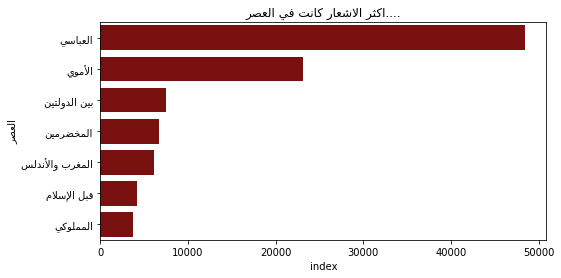

In [8]:
zlbl= get_display( arabic_reshaper.reshape('....اكثر الاشعار كانت في العصر'))
plt.figure(figsize=[8,4])
plt.title(zlbl)
df_tuple4 =list(zip(Most_Generation['index'],Most_Generation['العصر']))

first_columns= [get_display( arabic_reshaper.reshape(x[0])) for x in df_tuple4]
second_columns= [x[1] for x in df_tuple4]

xlbl = get_display( arabic_reshaper.reshape('index'))
ylbl = get_display( arabic_reshaper.reshape('العصر'))


sns.barplot(x = second_columns ,y=first_columns,data=Most_Generation,color = "DarkRed");
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.ylabel(ylbl, fontdict=None, labelpad=None);

In [9]:
count_poet = df['الشاعر'].value_counts().sort_values(ascending=False ).to_frame().reset_index()
count_poet

,index,الشاعر
0,البُحتُرِيّ,15850
1,أبو نُوّاس,8796
2,بَشّارِ بنِ بُرد,7510
3,أَبو تَمّام,7253
4,الفَرَزدَق,7227
5,جَرير,5638
6,المُتَنَبّي,5577
7,أبو العَتاهِيَة,5528
8,عمر بن أبي ربيعة,4023
9,بهاء الدين زهير,3799


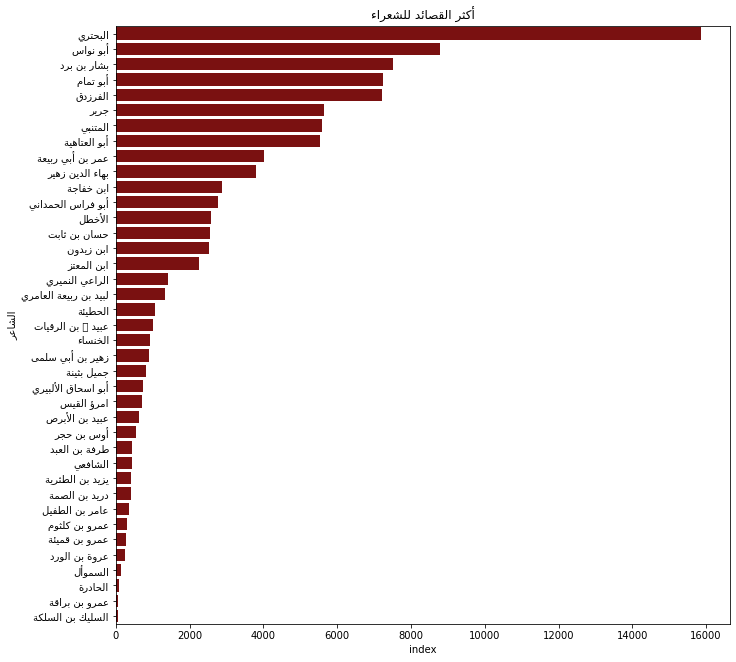

In [10]:
zlbl= get_display( arabic_reshaper.reshape('أكثر القصائد للشعراء'))
plt.figure(figsize=[11,11])
plt.title(zlbl)
df_tuple =list(zip(count_poet['index'],count_poet['الشاعر']))

first_columns= [get_display( arabic_reshaper.reshape(x[0])) for x in df_tuple]
second_columns= [x[1] for x in df_tuple]

xlbl = get_display( arabic_reshaper.reshape('index'))
ylbl = get_display( arabic_reshaper.reshape('الشاعر'))


sns.barplot(x = second_columns ,y=first_columns,data=count_poet,color = "DarkRed");
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.ylabel(ylbl, fontdict=None, labelpad=None);

In [11]:
df.الديوان.value_counts()

الديوان الرئيسي    100000
Name: الديوان, dtype: int64

In [12]:
count_rhyme = df['القافية'].value_counts().sort_values(ascending=False ).to_frame().reset_index()
count_rhyme

,index,القافية
0,ر,16777
1,ل,13389
2,ب,12907
3,د,12422
4,م,10664
5,ن,6852
6,ع,4011
7,ق,3697
8,ح,2679
9,ف,2484


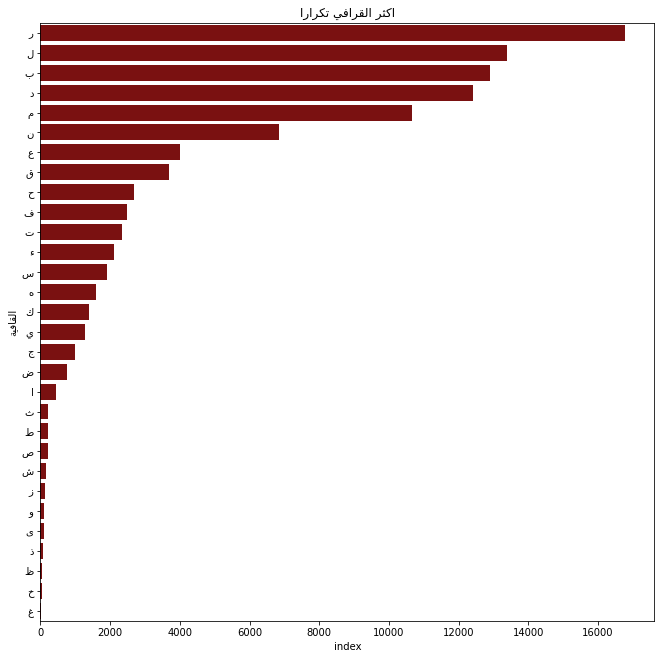

In [13]:
zlbl= get_display( arabic_reshaper.reshape('ًاكثر القرافي تكرارا'))
plt.figure(figsize=[11,11])
plt.title(zlbl)
df_tuple2 =list(zip(count_rhyme['index'],count_rhyme['القافية']))

first_columns= [get_display( arabic_reshaper.reshape(x[0])) for x in df_tuple2]
second_columns= [x[1] for x in df_tuple2]

xlbl = get_display( arabic_reshaper.reshape('index'))
ylbl = get_display( arabic_reshaper.reshape('القافية'))


sns.barplot(x = second_columns ,y=first_columns,data=count_rhyme,color = "DarkRed");
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.ylabel(ylbl, fontdict=None, labelpad=None);

In [14]:
count_poem_type = df['البحر'].value_counts().sort_values(ascending=False ).to_frame().reset_index()
count_poem_type

,index,البحر
0,الطويل,31481
1,الكامل,19133
2,البسيط,12020
3,الوافر,10662
4,الخفيف,7957
5,المتقارب,3518
6,المنسرح,3491
7,السريع,3247
8,الرجز,3115
9,الرمل,3030


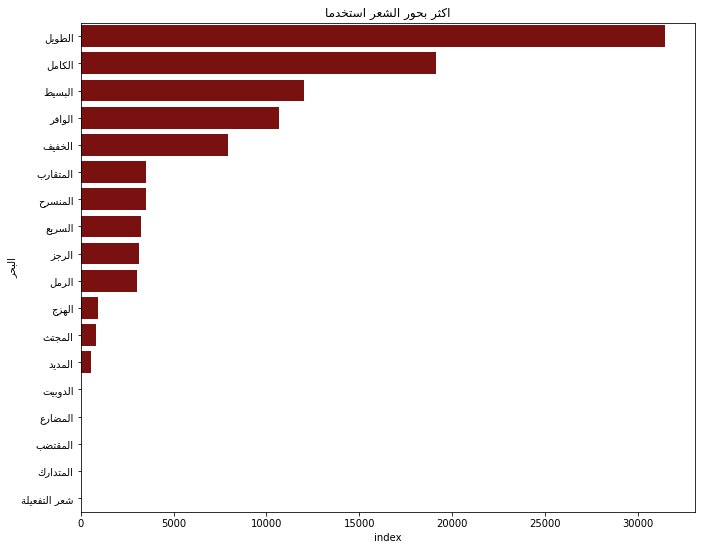

In [15]:
zlbl= get_display( arabic_reshaper.reshape('اكثر بحور الشعر استخدماً'))
plt.figure(figsize=[11,9])
plt.title(zlbl)
df_tuple3 =list(zip(count_poem_type['index'],count_poem_type['البحر']))

first_columns= [get_display( arabic_reshaper.reshape(x[0])) for x in df_tuple3]
second_columns= [x[1] for x in df_tuple3]

xlbl = get_display( arabic_reshaper.reshape('index'))
ylbl = get_display( arabic_reshaper.reshape('البحر'))


sns.barplot(x = second_columns ,y=first_columns,data=count_poem_type ,color = "DarkRed");
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.ylabel(ylbl, fontdict=None, labelpad=None);

# EDA 1-2: Data cleaning

In [16]:
df.isna().sum()

العصر             0
الشاعر            0
الديوان           0
القافية           0
البحر             0
الشطر الايسر    881
الشطر الايمن      0
البيت             0
dtype: int64

In [17]:
df.dropna(how='any',inplace=True)

In [18]:
df.duplicated().sum()

76

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99043 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   العصر         99043 non-null  object
 1   الشاعر        99043 non-null  object
 2   الديوان       99043 non-null  object
 3   القافية       99043 non-null  object
 4   البحر         99043 non-null  object
 5   الشطر الايسر  99043 non-null  object
 6   الشطر الايمن  99043 non-null  object
 7   البيت         99043 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


In [21]:
df.columns

Index(['العصر', 'الشاعر', 'الديوان', 'القافية', 'البحر', 'الشطر الايسر',
       'الشطر الايمن', 'البيت'],
      dtype='object')

# EDA1-3: Text Preprocessing

> Removing stop words

> Tokenization: Words, ngrams

> Stemming or Lemmatizations 

> Part of speech

> Word corrections

> NER 

In [22]:
#take order smaller datafram = 100000
df=df.iloc[:20000,:]

In [23]:
df.head(15)
df['poem_id']=df.index
df.head(15)

,العصر,الشاعر,الديوان,القافية,البحر,الشطر الايسر,الشطر الايمن,البيت,poem_id
0,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَأَن تَجمَعا شَملي وَتَنتَظِرا غَدا,خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا,خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا وَأَن...,0
1,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَلا سُرعَتي يَوماً بِسابِقَةِ الرَدى,فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ,فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ وَلا سُ...,1
2,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَتَستَوجِبا مَنّاً عَلَيَّ وَتُحمَدا,وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً,وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً وَتَ...,2
3,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,تُؤامِرُني سِرّاً لِأَصرِمَ مَرثَدا,لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ,لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ تُؤامِرُ...,3
4,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَأَفرَعَ في لَومي مِراراً وَأَصعَدا,وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ,وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ وَأَفر...,4
5,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,سِوى قَولِ باغٍ كادَني فَتَجَهَّدا,عَلى غَيرِ ذَنبٍ أَن أَكونَ جَنَيتُهُ,عَلى غَيرِ ذَنبٍ أَن أَكونَ جَنَيتُهُ سِوى ...,5
6,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,إِذا ما المُنادي في المَقامَةِ نَدَّدا,لَعَمري لَنِعمَ المَرءُ تَدعو بِحَبلِهِ,لَعَمري لَنِعمَ المَرءُ تَدعو بِحَبلِهِ إِذ...,6
7,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَلا مُؤيِسٌ مِنها إِذا هُوَ أَوقَدا,عَظيمُ رَمادِ القِدرِ لا مُتَعَبِّسٌ,عَظيمُ رَمادِ القِدرِ لا مُتَعَبِّسٌ وَلا م...,7
8,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,مِنَ الريحِ لَم تَترُك لِذي المالِ مِرفَدا,وَإِن صَرَّحَت كَحلٌ وَهَبَّت عَرِيَّةٌ,وَإِن صَرَّحَت كَحلٌ وَهَبَّت عَرِيَّةٌ مِن...,8
9,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,إِذا ضَنَّ ذو القُربى عَلَيهِم وَأَخمَدا,صَبَرتُ عَلى وَطءِ المَوالي وَحَطمِهِم,صَبَرتُ عَلى وَطءِ المَوالي وَحَطمِهِم إِذا...,9


In [24]:
df.rename(columns={'العصر': 'Generation','الشاعر':'poet_name','الديوان':'divan','القافية':'rhyme','البحر':'poem_type','الشطر الايسر':'left_side','الشطر الايمن':'right_side','البيت':'verse'}, inplace=True)
df = df.reindex(columns=['poem_id','Generation', 'poet_name', 'divan', 'rhyme', 'poem_type', 'left_side','right_side', 'verse'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 20130
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_id     20000 non-null  int64 
 1   Generation  20000 non-null  object
 2   poet_name   20000 non-null  object
 3   divan       20000 non-null  object
 4   rhyme       20000 non-null  object
 5   poem_type   20000 non-null  object
 6   left_side   20000 non-null  object
 7   right_side  20000 non-null  object
 8   verse       20000 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.5+ MB


In [26]:
df.head()

,poem_id,Generation,poet_name,divan,rhyme,poem_type,left_side,right_side,verse
0,0,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَأَن تَجمَعا شَملي وَتَنتَظِرا غَدا,خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا,خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا وَأَن...
1,1,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَلا سُرعَتي يَوماً بِسابِقَةِ الرَدى,فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ,فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ وَلا سُ...
2,2,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَتَستَوجِبا مَنّاً عَلَيَّ وَتُحمَدا,وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً,وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً وَتَ...
3,3,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,تُؤامِرُني سِرّاً لِأَصرِمَ مَرثَدا,لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ,لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ تُؤامِرُ...
4,4,قبل الإسلام,عمرو بنِ قُمَيئَة,الديوان الرئيسي,د,الطويل,وَأَفرَعَ في لَومي مِراراً وَأَصعَدا,وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ,وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ وَأَفر...


In [27]:
df.apply(pd.Series.nunique)

poem_id       20000
Generation        4
poet_name         9
divan             1
rhyme            29
poem_type        13
left_side     19980
right_side    19961
verse         20000
dtype: int64

In [28]:
df.shape

(20000, 9)

In [29]:
#df[df['poet_name']=='عمرو بنِ قُمَيئَة']
df.poet_name.value_counts().sort_values(ascending=False)

أَبو تَمّام              6322
المُتَنَبّي              5564
أبو فِراس الحَمَداني     2774
الأَخطَل                 2503
الراعي النُمَيري         1413
الحُطَيئَة               1038
عمرو بنِ قُمَيئَة         266
عمرو بن بَرّاقَة           66
السُليَك بن السَلَكَة      54
Name: poet_name, dtype: int64

In [30]:
df.rhyme.value_counts().sort_values(ascending=False)

ل    3430
ر    3002
د    2691
ب    2589
م    2538
ن    1057
ع     769
ق     746
ح     448
ء     425
س     383
ف     365
ي     346
ه     207
ك     206
ت     191
ض     160
ج     142
ث      72
ش      59
ا      57
ز      51
ذ      17
غ      11
ظ      11
ص      10
و       9
ط       7
خ       1
Name: rhyme, dtype: int64

أبيات القصيدة كلّها مَبنيّةً على تفعيلةٍ واحدةٍ تتبع لبحرٍ مُعيّنٍ من بحور الشّعر العربيّ.
وبحور الشّعر ستّة عشر بحراً وهي:
المُتدارَك، والمُتقارِب، والمُجتثّ، والمُقتَضَب، والمُضارِع، والخفيف، والمُنسرِح، والسّريع، والرَّمَل، والرَّجَز، والهَزَج، والكامل، والوافر، والبَسيط، والمَديد، والطّويل.

In [31]:
df.poem_type.value_counts().sort_values(ascending=False)

الطويل      6350
الكامل      4116
البسيط      3332
الوافر      2518
الخفيف      1270
المنسرح      701
المتقارب     693
الرجز        437
السريع       374
الرمل         74
المجتث        64
الهزج         55
المديد        16
Name: poem_type, dtype: int64

In [32]:
df.Generation.value_counts().sort_values(ascending=False)

العباسي        14660
الأموي          3916
المخضرمين       1104
قبل الإسلام      320
Name: Generation, dtype: int64

In [33]:
#df.groupby('rhyme')['poet_name'].value_counts().sort_values(ascending=False)
poet_rhyme =df.groupby('poet_name')['poem_type']
poet_rhyme.value_counts().sort_values(ascending=False)

poet_name         poem_type
أَبو تَمّام       الكامل       2090
المُتَنَبّي       الطويل       1536
أَبو تَمّام       الطويل       1368
الأَخطَل          الطويل       1142
أَبو تَمّام       البسيط       1038
                               ... 
الأَخطَل          الخفيف          5
                  المديد          4
الحُطَيئَة        السريع          4
عمرو بن بَرّاقَة  الكامل          1
الأَخطَل          الرمل           1
Name: poem_type, Length: 71, dtype: int64

In [34]:
df.verse

0        خَليلَيَّ لا تَستَعجِلا أَن تَزَوَّدا    وَأَن...
1        فَما لَبَثٌ يَوماً بِسابِقٍ مَغنَمٍ    وَلا سُ...
2        وَإِن تُنظِراني اليَومَ أَقضِ لُبانَةً    وَتَ...
3        لَعَمرُكَ ما نَفسٌ بِجِدٍ رَشيدَةٍ    تُؤامِرُ...
4        وَإِن ظَهَرَت مِنهُ قَوارِصُ جَمَّةٌ    وَأَفر...
                               ...                        
20126    ما أُنشِئَت لِلمَكرُماتِ سَحابَةٌ    إِلّا وَم...
20127    أُنظُر فَحَيثُ تَرى السُيوفَ لَوامِعاً    أَبَ...
20128    شوسٌ إِذا خَفَقَت عُقابُ لِوائِهِم    ظَلَّت ق...
20129    بُلهٌ إِذا لَبِسوا الحَديدَ حَسِبتَهُم    لَم ...
20130    قُل ما بَدا لَكَ يا اِبنَ تُرنا فَالصَدا    بِ...
Name: verse, Length: 20000, dtype: object

In [35]:
poet_rhyme = df.groupby(['poet_name','rhyme']).size().reset_index(name ='Count')
print(poet_rhyme)

                poet_name rhyme  Count
0    أبو فِراس الحَمَداني     ء     34
1    أبو فِراس الحَمَداني     ا     11
2    أبو فِراس الحَمَداني     ب    393
3    أبو فِراس الحَمَداني     ت      5
4    أبو فِراس الحَمَداني     ث      5
..                    ...   ...    ...
138     عمرو بنِ قُمَيئَة     ف     14
139     عمرو بنِ قُمَيئَة     ل    106
140     عمرو بنِ قُمَيئَة     م     43
141     عمرو بنِ قُمَيئَة     ن      1
142     عمرو بنِ قُمَيئَة     ي     32

[143 rows x 3 columns]


In [36]:
from nltk.corpus import stopwords

In [37]:
stop_words = stopwords.words('arabic')
stop_words.extend(['هـ', 'د', 'م', 'الى', 'ان', 'اذ', 'لهذه', 'قال', 'وقال', 'اكد', 'عدد', 'بعدد', 'وعدد'
                  , 'والتي', 'بن', 'بنت', 'وقد', 'ا', 'عبر', 'خلال', 'او', 'الا', 'وان', 'اي', 'بان', 'كان'
                  , 'كانت' ,'تم','الف','مليون', 'وفي', 'وقد','اكثر','اقل', 'انه','وانه', 'قالت', 'وقالت', 'وتم','اذا'])

In [38]:
# remove a special character _
df.verse= df.verse.apply(lambda x: re.sub(r'[_]+', '', x))

# remove (non-arabic-alphabet)
df.verse= df.verse.str.replace('[^ء-ي ]', '')
#Arabic Normalization:

#1-1 replcae (أ,آ,إ) by (ا)
df.verse=df.verse.apply(lambda x: re.sub('[أإآ]', 'ا', x))

#1-2 replace (ة) by (ه)
df.verse = df.verse.apply(lambda x: re.sub('[ة]', 'ه', x))

# 1-3 replace (ي) by (ى)
df.verse = df.verse.apply(lambda x: re.sub("ى", "ي", x))

# 1-4 replace (كـ) by (ك)
df.verse = df.verse.apply(lambda x: re.sub("گ", "ك", x))

# remove multi spaces
df.verse= df.verse.apply(lambda x: re.sub(' +', ' ', x).strip())

# #Remove stop words
df.verse=df.verse.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


#Remove Repeated word
df.verse= df.verse.apply(lambda x: re.sub(r'(.)\1+', r'\1\1',x))


In [39]:
# remove punctuations
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
df.verse= df.verse.apply(lambda x: x.translate(str.maketrans('', '', punctuations_list)))

In [40]:
df.verse

0                   خليلي تستعجلا تزودا تجمعا شملي وتنتظرا
1          فما لبث يوما بسابق مغنم سرعتي يوما بسابقه الردي
2          تنظراني اليوم اقض لبانه وتستوجبا منا علي وتحمدا
3                      لعمرك بجد رشيده تؤامرني لاصرم مرثدا
4                   ظهرت قوارص جمه وافرع لومي مرارا واصعدا
                               ...                        
20126                    انشئت للمكرمات سحابه ايديهم تتدفق
20127    انظر فحيث تري السيوف لوامعا ابدا ففوق رؤوسهم ت...
20128        شوس خفقت عقاب لوائهم ظلت قلوب الموت منهم تخفق
20129           بله لبسوا الحديد حسبتهم يحسبوا المنيه تخلق
20130           قل بدا ابن ترنا فالصدا بمهذب العقيان يتعلق
Name: verse, Length: 20000, dtype: object

In [41]:
allowed_chars = ['ض', 'ص', 'ث', 'ق', 'ف', 'غ', 'ع', 'ه', 'خ', 'ح', 'ج', 'د', 'ش', 'س', 'ي', 'ب', 'ل', 'ا', 'ت', 'ن', 'م',
                 'ك', 'ط', 'ئ', 'ء', 'ؤ', 'ر' , 'ى', 'ة', 'و', 'ز', 'ظ', 'إ' ,'أ', 'آ', ' ', '\n', 'ذ', 'ّ']

In [42]:
# import pickle

# with open('vocabs.pkl', 'rb') as pickle_load:
#     voc_list = pickle.load(pickle_load)

In [43]:
# import markovify
# from tqdm import tqdm

# def markov(text_file):
#     with open(text_file, 'r', encoding='utf-8') as f:
#         text = f.read()
#     text_model = markovify.NewlineText(text)
#     return text_model

In [44]:
# def generate_poem_single_rhyme(poet_name, rhyme, iterations=3000, use_tqdm=False):
#     n_of_rhyme_letters = len(rhyme)
#     input_ff =  df[['poet_name','verse']] == poet_name]
#     #input_file = 'verse.txt'
#     text_model = markov(input_ff)
#     rhymes_list = rhymes_with_last_n_chars(rhyme, n_of_rhyme_letters)
#     bayts = set()
#     used_rhymes = set()
    
#     poem = ""
    
#     if use_tqdm == True:
#         if hasattr(tqdm, '_instances'): tqdm._instances.clear()
#         it_range = tqdm(range(iterations))
#     else:
#         it_range = range(iterations)
        
#     for i in it_range:
#         bayt = text_model.make_short_sentence(280, tries=100)
#         last_word = bayt.split()[-1]
#         if (last_word in rhymes_list) and (last_word not in used_rhymes) and (bayt not in bayts):
#             bayts.add(bayt)
#             used_rhymes.add(last_word)
#             poem += "{}\n".format(bayt)
#             if not use_tqdm:
#                 print(bayt)
#     return poem


In [45]:
#x = generate_poem_single_rhyme('ب','الأَخطَل', iterations=3000, use_tqdm=False)

# Baseline Model

In [46]:
x = df[['verse','rhyme','poem_type','Generation']]
y = df.poet_name

In [47]:
x.shape

(20000, 4)

In [48]:
y.shape

(20000,)

In [49]:
y.unique()

array(['عمرو بنِ قُمَيئَة', 'السُليَك بن السَلَكَة', 'عمرو بن بَرّاقَة',
       'المُتَنَبّي', 'الأَخطَل', 'الراعي النُمَيري', 'الحُطَيئَة',
       'أبو فِراس الحَمَداني', 'أَبو تَمّام'], dtype=object)

In [50]:
label_dict = {
    'عمرو بنِ قُمَيئَة':0,
    'السُليَك بن السَلَكَة':1,
    'عمرو بن بَرّاقَة':2,
    'المُتَنَبّي':3,
    'الأَخطَل':4,
    'أبو فِراس الحَمَداني':5,
    'أَبو تَمّام':6,
    'الراعي النُمَيري':7,
    'الحُطَيئَة':8
}

In [51]:
y=y.map(label_dict)
y.unique()

array([0, 1, 2, 3, 4, 7, 8, 5, 6], dtype=int64)

In [52]:
x_train_val,x_test,y_train_val,y_test = train_test_split(x,y, test_size=0.2, random_state= 30)

In [53]:
x_train_val

,verse,rhyme,poem_type,Generation
10860,امين الفصوص كعير الفلاه يتلو نحائص قبا جساما,م,المتقارب,المخضرمين
1490,خمصانه ارق الخم بقلب اقسي الجلمود,د,الخفيف,العباسي
14015,الشرخ حجاه والشرخ شبابه,ب,الرجز,العباسي
4478,الزمت نفسك شيئا يلزمها يواريهم ارض,م,البسيط,العباسي
14696,خذها فما نالها بنقص موت جرير البعيث,ث,البسيط,العباسي
...,...,...,...,...
510,وامست تخيرنا بالنقاب وادي المياه ووادي القري,ء,المتقارب,العباسي
12206,واكره اعلام الوشاه بهجره فاعتبه واشكره جهرا,ر,الطويل,العباسي
15407,وكم عندي يد مستهله علي كفران عندي جحد,د,الطويل,العباسي
4538,اتوك يجرون الحديد كانهم سروا بجياد قوائم,م,الطويل,العباسي


# Classify each Poet name with his verses by using Logistic Regression

# TF-IDF Vectorizer

In [54]:
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))
x_train_val_verse=x_train_val['verse']

In [55]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
#from sklearn.feature_extraction.text import CountVectorizer
# the document-term matrix 
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))
tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words=arb_stopwords, max_df=.8, min_df=5)
x_train_cv1 = tfidf.fit_transform(x_train_val_verse)
#x_val_cv1  = tfidf.transform(x_train_val_verse)

tfidf_feature_name=pd.DataFrame(x_train_cv1.toarray(),columns=tfidf.get_feature_names())
tfidf_feature_name.head()

اب  ابا  ابا الحسين  ابا جعفر  اباء  اباؤه  اباك  ابالي  ابت  ابدا  ابدي  \
0  0.0  0.0         0.0       0.0   0.0    0.0   0.0    0.0  0.0   0.0   0.0   
1  0.0  0.0         0.0       0.0   0.0    0.0   0.0    0.0  0.0   0.0   0.0   
2  0.0  0.0         0.0       0.0   0.0    0.0   0.0    0.0  0.0   0.0   0.0   
3  0.0  0.0         0.0       0.0   0.0    0.0   0.0    0.0  0.0   0.0   0.0   
4  0.0  0.0         0.0       0.0   0.0    0.0   0.0    0.0  0.0   0.0   0.0   

   ابراهيم  ابصرت  ابعد  ابغي  ابقت  ابقي  ابقيت  ابكي  ابل  ابلج  ابلغ  ابلي  \
0      0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0   0.0   0.0   
1      0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0   0.0   0.0   
2      0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0   0.0   0.0   
3      0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0   0.0   0.0   
4      0.0    0.0   0.0   0.0   0.0   0.0    0.0   0.0  0.0   0.0   0.0   0.0   

   ابليت  ابن  ابن ابي  ابن عبد  ابن عمي  ابن مروان  ابنا  ابناء  ابنك  ابنه  \
0    0.0  0.0      0.0      0.0      0.0        0.0   0.0    0.0   0.0   0.0   
1    0.0  0.0      0.0      0.0      0.0        0.0   0.0    0.0   0.0   0.0   
2    0.0  0.0      0.0      0.0      0.0        0.0   0.0    0.0   0.0   0.0   
3    0.0  0.0      0.0      0.0      0.0        0.0   0.0    0.0   0.0   0.0   
4    0.0  0.0      0.0      0.0      0.0        0.0   0.0    0.0   0.0   0.0   

   ابني  ابو  ابوك  ابوه  ابي  ابي سعيد  ابي شجاع  ابيت  ابيض  ابيك  ابينا  \
0   0.0  0.0   0.0   0.0  0.0       0.0       0.0   0.0   0.0   0.0    0.0   
1   0.0  0.0   0.0   0.0  0.0       0.0       0.0   0.0   0.0   0.0    0.0   
2   0.0  0.0   0.0   0.0  0.0       0.0       0.0   0.0   0.0   0.0    0.0   
3   0.0  0.0   0.0   0.0  0.0       0.0       0.0   0.0   0.0   0.0    0.0   
4   0.0  0.0   0.0   0.0  0.0       0.0       0.0   0.0   0.0   0.0    0.0   

   ابيه  اتاك  اتاني  اتاها  اتت  اتتك  اتي  اتيت  اثار  اثاره  اثر  اثرت  \
0   0.0   0.0    0.0    0.0  0.0   0.0  0.0   0.0   0.0    0.0  0.0   0.0   
1   0.0   0.0    0.0    0.0  0.0   0.0  0.0   0.0   0.0    0.0  0.0   0.0   
2   0.0   0.0    0.0    0.0  0.0   0.0  0.0   0.0   0.0    0.0  0.0   0.0   
3   0.0   0.0    0.0    0.0  0.0   0.0  0.0   0.0   0.0    0.0  0.0   0.0   
4   0.0   0.0    0.0    0.0  0.0   0.0  0.0   0.0   0.0    0.0  0.0   0.0   

   اثم  اثيث  اجد  اجر  اجل  اجمع  اجمل  اجن  احاديث  احب  احد  احدا  احدي  \
0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0  0.0  0.0   0.0   0.0   
1  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0  0.0  0.0   0.0   0.0   
2  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0  0.0  0.0   0.0   0.0   
3  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0  0.0  0.0   0.0   0.0   
4  0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0     0.0  0.0  0.0   0.0   0.0   

   احذر  احرزت  احسان  احسانه  احسب  احسن  احق  احلام  احلي  احمد  احمر  احيا  \
0   0.0    0.0    0.0     0.0   0.0   0.0  0.0    0.0   0.0   0.0   0.0   0.0   
1   0.0    0.0    0.0     0.0   0.0   0.0  0.0    0.0   0.0   0.0   0.0   0.0   
2   0.0    0.0    0.0     0.0   0.0   0.0  0.0    0.0   0.0   0.0   0.0   0.0   
3   0.0    0.0    0.0     0.0   0.0   0.0  0.0    0.0   0.0   0.0   0.0   0.0   
4   0.0    0.0    0.0     0.0   0.0   0.0  0.0    0.0   0.0   0.0   0.0   0.0   

   احياء  احيانا   اخ  اخا  اخاف  اخت  اخذ  اخذت  اخذوا  اخر  اخر الليل  اخري  \
0    0.0     0.0  0.0  0.0   0.0  0.0  0.0   0.0    0.0  0.0        0.0   0.0   
1    0.0     0.0  0.0  0.0   0.0  0.0  0.0   0.0    0.0  0.0        0.0   0.0   
2    0.0     0.0  0.0  0.0   0.0  0.0  0.0   0.0    0.0  0.0        0.0   0.0   
3    0.0     0.0  0.0  0.0   0.0  0.0  0.0   0.0    0.0  0.0        0.0   0.0   
4    0.0     0.0  0.0  0.0   0.0  0.0  0.0   0.0    0.0  0.0        0.0   0.0   

   اخشي  اخضر  اخف  اخلاق  اخلاقه  اخو  اخو الحرب  اخو ثقه  اخوان  اخوه  اخي  \
0   0.0   0.0  0.0    0.0     0.0  0.0        0.0      0.0    0.0   0.0  0.0   
1   0.0   0.0  0.0  

In [56]:
?ArabicWordCloud

In [57]:
tfidf_feature_name.shape

(16000, 4288)

In [58]:
x_train_val_rhyme=pd.get_dummies(x_train_val['rhyme'],drop_first=True)
x_train_val_rhyme

,ا,ب,ت,ث,ج,ح,خ,د,ذ,ر,ز,س,ش,ص,ض,ط,ظ,ع,غ,ف,ق,ك,ل,م,ن,ه,و,ي
10860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1490,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14696,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12206,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15407,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [59]:
x_train_val['poem_type'].unique()

array(['المتقارب', 'الخفيف', 'الرجز', 'البسيط', 'الطويل', 'الكامل',
       'الوافر', 'السريع', 'المنسرح', 'الهزج', 'المجتث', 'الرمل',
       'المديد'], dtype=object)

In [60]:
x_train_val_poem_type=pd.get_dummies(x_train_val['poem_type'],drop_first=True)
x_train_val_poem_type

,الخفيف,الرجز,الرمل,السريع,الطويل,الكامل,المتقارب,المجتث,المديد,المنسرح,الهزج,الوافر
10860,0,0,0,0,0,0,1,0,0,0,0,0
1490,1,0,0,0,0,0,0,0,0,0,0,0
14015,0,1,0,0,0,0,0,0,0,0,0,0
4478,0,0,0,0,0,0,0,0,0,0,0,0
14696,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
510,0,0,0,0,0,0,1,0,0,0,0,0
12206,0,0,0,0,1,0,0,0,0,0,0,0
15407,0,0,0,0,1,0,0,0,0,0,0,0
4538,0,0,0,0,1,0,0,0,0,0,0,0


In [61]:
x_train_val_rhyme=pd.get_dummies(x_train_val['rhyme'],drop_first=True)
x_train_val_rhyme

,ا,ب,ت,ث,ج,ح,خ,د,ذ,ر,ز,س,ش,ص,ض,ط,ظ,ع,غ,ف,ق,ك,ل,م,ن,ه,و,ي
10860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1490,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14015,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14696,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12206,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15407,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4538,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [62]:
x_train_val['Generation'].unique()

array(['المخضرمين', 'العباسي', 'الأموي', 'قبل الإسلام'], dtype=object)

In [63]:
x_train_val_Generation=pd.get_dummies(x_train_val['Generation'],drop_first=True)
x_train_val_Generation

,العباسي,المخضرمين,قبل الإسلام
10860,0,1,0
1490,1,0,0
14015,1,0,0
4478,1,0,0
14696,1,0,0
...,...,...,...
510,1,0,0
12206,1,0,0
15407,1,0,0
4538,1,0,0


In [64]:
x_train_val_poem_type.shape

(16000, 12)

In [65]:
x_train_val_Generation.shape

(16000, 3)

In [66]:
x_train_val_rhyme.shape

(16000, 28)

In [67]:
tfidf_feature_name.shape

(16000, 4288)

In [68]:
new_x_train_val=np.hstack((x_train_val_rhyme,tfidf_feature_name,x_train_val_poem_type,x_train_val_Generation))

In [69]:
new_x_train_val.shape

(16000, 4331)

In [70]:
y_train_val.shape

(16000,)

In [71]:
new_df=pd.DataFrame(new_x_train_val)
new_df.shape

(16000, 4331)

In [72]:
x_train,x_val,y_train,y_val = train_test_split(new_df,y_train_val, test_size=0.2, random_state= 30)

In [73]:
y_val.shape,x_val.shape

((3200,), (3200, 4331))

# Experiment 1:Logistic Regression Classification

In [74]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C= 1,class_weight='balanced')

In [75]:
# Train the first model

lr.fit(x_train, y_train)
y_pred_cv1 = lr.predict(x_train)
y_pred_cv2 = lr.predict(x_val)


In [76]:
# scores for the first logistic regression model
print("\nTraining Logistic Regression1 Accuracy=",accuracy_score(y_train, y_pred_cv1))
print("\nTRaining Logistic Regression1 F1 score=",f1_score(y_train, y_pred_cv1, average='weighted'))
print("\nTraining Logistic Regression1 percision=",precision_score(y_train, y_pred_cv1, average='weighted'))
print("\nTraining Logistic Regression1 F1 recall=",recall_score(y_train, y_pred_cv1, average='weighted'))


Training Logistic Regression1 Accuracy= 0.7659375

TRaining Logistic Regression1 F1 score= 0.7674228589660977

Training Logistic Regression1 percision= 0.7737569196469508

Training Logistic Regression1 F1 recall= 0.7659375


In [77]:
# scores for the first logistic regression model
print("\nTest Logistic Regression1 Accuracy=",accuracy_score(y_val, y_pred_cv2))
print("\nTest Logistic Regression1 F1 score=",f1_score(y_val, y_pred_cv2, average='weighted'))
print("\nTest Logistic Regression1 percision=",precision_score(y_val, y_pred_cv2, average='weighted'))
print("\nTest Logistic Regression1 F1 recall=",recall_score(y_val, y_pred_cv2, average='weighted'))


Test Logistic Regression1 Accuracy= 0.6378125

Test Logistic Regression1 F1 score= 0.6397599270581532

Test Logistic Regression1 percision= 0.6461562961281786

Test Logistic Regression1 F1 recall= 0.6378125


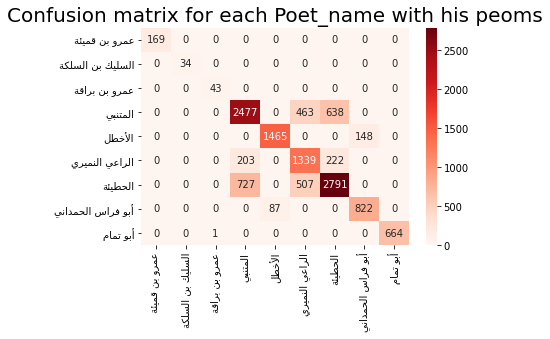

In [78]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_train, y_pred_cv1)

class_label =['عمرو بنِ قُمَيئَة', 'السُليَك بن السَلَكَة', 'عمرو بن بَرّاقَة', 'المُتَنَبّي', 'الأَخطَل', 'الراعي النُمَيري', 'الحُطَيئَة','أبو فِراس الحَمَداني', 'أَبو تَمّام']
reshaped_label = [get_display( arabic_reshaper.reshape(poet)) for poet in class_label]
#get_display( arabic_reshaper.reshape(class_label))
df_cm = pd.DataFrame(cm, index = reshaped_label, columns = reshaped_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Reds')
plt.title('Confusion matrix for each Poet_name with his peoms', fontsize = 20);

In [79]:
# LR = LogisticRegression()
# LRparam_grid = {
#     'C': [ 0.1, 1, 5],
#     'penalty': ['l1', 'l2'],
#     'max_iter': list(range(100,800,100)),
#     'solver': ['newton-cg', 'lbfgs', 'liblinear']
# }
# LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# # fitting the model for grid search 
# LR_search.fit(x_train , y_train)
# LR_search.best_params_
# # summarize
# print('Mean Accuracy: %.3f' % LR_search.best_score_)
# print('Config: %s' % LR_search.best_params_)

In [80]:
# From the abive cell we selected the best parameters for Logistic regression
lg_best = LogisticRegression(C=1,
                                 penalty='l2',
                                 max_iter=100,solver= 'liblinear',class_weight='balanced')

In [81]:
# Train the first model with best para_
lg_best.fit(x_train, y_train)
y_pred_cv3 = lg_best.predict(x_train)
# # Train the second model
# lg_best.fit(x_train, y_train)
y_pred_cv4 = lg_best.predict(x_val)
lr_1=lr.score(x_val, y_val)

In [82]:
# scores for the first logistic regression model
print("\nTraining Logistic Regression with best parameters1 Accuracy=",accuracy_score(y_train, y_pred_cv3))
print("\nTraining Logistic Regression with best parameters1 F1 score=",f1_score(y_train, y_pred_cv3, average='weighted'))
print("\nTraining Logistic Regression with best parameters1 precision score=",precision_score(y_train, y_pred_cv3, average='weighted'))
print("\nTraining Logistic Regression1 with best parameters1 recall score =",recall_score(y_train, y_pred_cv3, average='weighted'))


Training Logistic Regression with best parameters1 Accuracy= 0.74640625

Training Logistic Regression with best parameters1 F1 score= 0.7456413443067098

Training Logistic Regression with best parameters1 precision score= 0.745965712013024

Training Logistic Regression1 with best parameters1 recall score = 0.74640625


In [83]:
# scores for second logistic regression model
print("\nTest Logistic Regression1 Accuracy=",accuracy_score(y_val, y_pred_cv4))
print("\nTest Logistic Regression1 F1 score=",f1_score(y_val, y_pred_cv4, average='weighted'))
print("\nTest Logistic Regression1 percision=",precision_score(y_val, y_pred_cv4, average='weighted'))
print("\nTest Logistic Regression1 F1 recall=",recall_score(y_val, y_pred_cv4, average='weighted'))


Test Logistic Regression1 Accuracy= 0.6415625

Test Logistic Regression1 F1 score= 0.6387911437172631

Test Logistic Regression1 percision= 0.6390773624040536

Test Logistic Regression1 F1 recall= 0.6415625


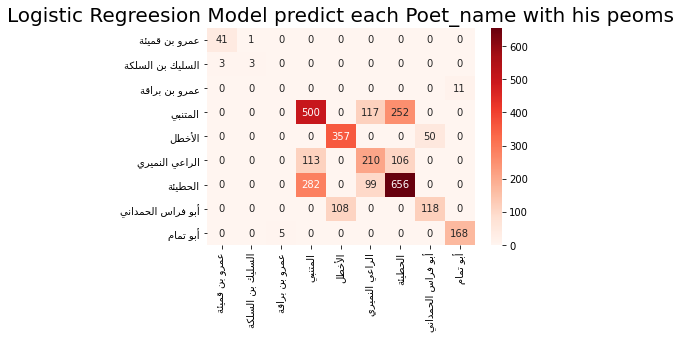

In [84]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_val, y_pred_cv4)

class_label =['عمرو بنِ قُمَيئَة', 'السُليَك بن السَلَكَة', 'عمرو بن بَرّاقَة', 'المُتَنَبّي', 'الأَخطَل', 'الراعي النُمَيري', 'الحُطَيئَة','أبو فِراس الحَمَداني', 'أَبو تَمّام']
reshaped_label = [get_display( arabic_reshaper.reshape(poet)) for poet in class_label]
#get_display( arabic_reshaper.reshape(class_label))
df_cm = pd.DataFrame(cm, index = reshaped_label, columns = reshaped_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Reds')
plt.title('Logistic Regreesion Model predict each Poet_name with his peoms', fontsize = 20);

# Experiment 2: Decision Tree Classification

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# # finding the best parameters for the decision tree
# param_grid = {'criterion' :['gini', 'entropy'],'max_depth': [4, 6, 10, 12]}

# tree_clas = DecisionTreeClassifier(random_state=42,class_weight='balanced')
# grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
# grid_search.fit(x_train, y_train)

# print(grid_search.best_estimator_)

In [86]:
Dt_final = grid_search.best_estimator_
Dt_final

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [87]:
# trying with entropy, since it didn't show in the previose step
tree = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=12,
                                     max_features='auto',
                                     random_state=42)

tree.fit(x_train,y_train)
y_pred = tree.predict(x_train)
dt_1=tree.score(x_val, y_val)
print("Training Score In Decision Tree Classification:",tree.score(x_train, y_train))
print("Validation Score In Decision Tree: Classification",tree.score(x_val, y_val))
y_pred1 = tree.predict(x_val)

Training Score In Decision Tree Classification: 0.383203125
Validation Score In Decision Tree: Classification 0.373125


In [88]:
# scores Trainind set in Decision tree model
print("\nTraining Decision Tree with best parameters1 Accuracy=",accuracy_score(y_train, y_pred))
print("\nTraining Decision Tree with best parameters1 F1 score=",f1_score(y_train, y_pred, average='weighted'))
print("\nTraining Decision Tree with best parameters1 precision score=",precision_score(y_train, y_pred, average='weighted'))
print("\n Training Decision Tree with best parameters1 recall score =",recall_score(y_train, y_pred, average='weighted'))


Training Decision Tree with best parameters1 Accuracy= 0.383203125

Training Decision Tree with best parameters1 F1 score= 0.30552456974887593

Training Decision Tree with best parameters1 precision score= 0.5099968823630178

 Training Decision Tree with best parameters1 recall score = 0.383203125


In [89]:
# scores Test set in Decision tree model
print("\nTest Decision Tree with best parameters1 Accuracy=",accuracy_score(y_val, y_pred1))
print("\nTest Decision Tree with best parameters1 F1 score=",f1_score(y_val, y_pred1, average='weighted'))
print("\nTest Decision Tree with best parameters1 precision score=",precision_score(y_val, y_pred1, average='weighted'))
print("\nTest Decision TreeLogistic Regression1 with best parameters1 recall score =",recall_score(y_val, y_pred1, average='weighted'))


Test Decision Tree with best parameters1 Accuracy= 0.373125

Test Decision Tree with best parameters1 F1 score= 0.2918717311288094

Test Decision Tree with best parameters1 precision score= 0.39429152957931207

Test Decision TreeLogistic Regression1 with best parameters1 recall score = 0.373125


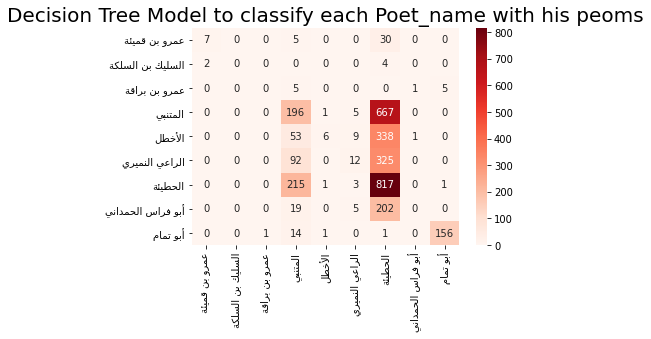

In [90]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_val, y_pred1)

class_label =['عمرو بنِ قُمَيئَة', 'السُليَك بن السَلَكَة', 'عمرو بن بَرّاقَة', 'المُتَنَبّي', 'الأَخطَل', 'الراعي النُمَيري', 'الحُطَيئَة','أبو فِراس الحَمَداني', 'أَبو تَمّام']
reshaped_label = [get_display( arabic_reshaper.reshape(poet)) for poet in class_label]
#get_display( arabic_reshaper.reshape(class_label))
df_cm = pd.DataFrame(cm, index = reshaped_label, columns = reshaped_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Reds')
plt.title('Decision Tree Model to classify each Poet_name with his peoms', fontsize = 20);

# Experiment 1:Random Forst Classification

In [91]:
params = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]}

In [92]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

imba_pipeline = make_pipeline(SMOTE(random_state=42),RandomForestClassifier(n_estimators=5, random_state=13))
cross_val_score(imba_pipeline, x_train, y_train, cv=kf)

KeyboardInterrupt: 

In [ ]:
# new_params = {'randomforestclassifier__' + key: params[key] for key in params}
# grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf,return_train_score=True)
# grid_imba.fit(x_train, y_train)

In [ ]:
rf_best=grid_imba.best_params_
rf_best

In [93]:
# Random Forest with best hyperparameter
rf_best = RandomForestClassifier(n_estimators=100,
                                 max_depth=12,
                                 random_state=13)
rf_best.fit(x_train, y_train)

y_traing_pred = rf_best.predict(x_train)

y_pred = rf_best.predict(x_val)
rf_1=rf_best.score(x_val, y_val)


In [94]:
# scores for training set in RF model
print("\nTraining Random Forst with best parameters1 Accuracy=",accuracy_score(y_train, y_traing_pred))
print("\nTraining Random Forst with best parameters1 F1 score=",f1_score(y_train, y_traing_pred, average='weighted'))
print("\nTraining Random Forst with best parameters1 precision score=",precision_score(y_train, y_traing_pred, average='weighted'))
print("\nTraining Random Forst with best parameters1 recall score =",recall_score(y_train, y_traing_pred, average='weighted'))


Training Random Forst with best parameters1 Accuracy= 0.436796875

Training Random Forst with best parameters1 F1 score= 0.34913956079465364

Training Random Forst with best parameters1 precision score= 0.522901548605047

Training Random Forst with best parameters1 recall score = 0.436796875


In [95]:
# scores for Validation set in RF model
print("\nTest Random Forst with best parameters1Logistic Regression1 Accuracy=",accuracy_score(y_val, y_pred))
print("\nTest Random Forst with best parameters1 F1 score=",f1_score(y_val, y_pred, average='weighted'))
print("\nTest Random Forst with best parameters1 percision=",precision_score(y_val, y_pred, average='weighted'))
print("\nTest Random Forst with best parameters1 F1 recall=",recall_score(y_val, y_pred, average='weighted'))


Test Random Forst with best parameters1Logistic Regression1 Accuracy= 0.41125

Test Random Forst with best parameters1 F1 score= 0.3137159705219611

Test Random Forst with best parameters1 percision= 0.4052278854699685

Test Random Forst with best parameters1 F1 recall= 0.41125


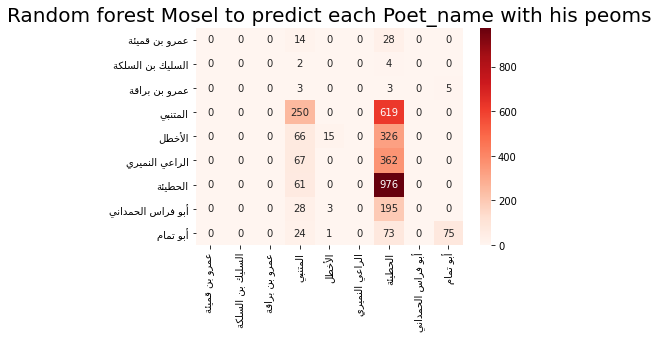

In [96]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_val, y_pred)

class_label =['عمرو بنِ قُمَيئَة', 'السُليَك بن السَلَكَة', 'عمرو بن بَرّاقَة', 'المُتَنَبّي', 'الأَخطَل', 'الراعي النُمَيري', 'الحُطَيئَة','أبو فِراس الحَمَداني', 'أَبو تَمّام']
reshaped_label = [get_display( arabic_reshaper.reshape(poet)) for poet in class_label]
#get_display( arabic_reshaper.reshape(class_label))
df_cm = pd.DataFrame(cm, index = reshaped_label, columns = reshaped_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Reds')
plt.title('Random forest Mosel to predict each Poet_name with his peoms', fontsize = 20);

In [ ]:
# import xgboost
# from sklearn.model_selection import RandomizedSearchCV
# params = { 'max_depth': [3, 6, 10, 15, 20],
#            'learning_rate': [0.01, 0.1, 0.2, 0.3],
#            'subsample': np.arange(0.5, 1.0, 0.1),
#            'colsample_bytree': np.arange(0.4, 1.0, 0.1),
#            'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
#            'n_estimators': [50,100],
#          'objective': ['binary:logistic']}

# xgbc = xgboost.XGBClassifier(seed = 20)

# rs = RandomizedSearchCV(estimator=xgbc, 
#                    param_distributions=params1,
#                    cv = 5,
#                    scoring='f1', 
#                    verbose=1,
#                    n_iter=25)

# rs.fit(x_train, y_train, eval_metric= 'logloss')
# rs.best_params_

In [98]:
import xgboost

xgbc = xgboost.XGBClassifier(subsample=0.8,
                         n_estimators=100,
                         max_depth=15,
                        learning_rate=0.01,
                        colsample_bytree=0.8,
                        colsample_bylevel=0.6
                        )

xgbc.fit(x_train,y_train,eval_metric= 'logloss')

y_traing_pred = xgbc.predict(x_train)

y_pred = xgbc.predict(x_val)
xgbc_1=xgbc.score(x_val, y_val)
print("xgbc Accuracy=",accuracy_score(y_val, y_pred))
print("xgbc F1 score=",f1_score(y_val, y_pred, average='weighted'))

xgbc Accuracy= 0.6665625
xgbc F1 score= 0.6529368761859843


In [100]:
# scores for training set in Xgboost model
print("\nTraining XGboost with best parameters1 Accuracy=",accuracy_score(y_train, y_traing_pred))
print("\nTraining XGboost with best parameters1 F1 score=",f1_score(y_train, y_traing_pred, average='weighted'))
print("\nTraining Random with best parameters1 precision score=",precision_score(y_train, y_traing_pred, average='weighted'))
print("\nTraining Random with best parameters1 recall score =",recall_score(y_train, y_traing_pred, average='weighted'))


Training XGboost with best parameters1 Accuracy= 0.698515625

Training XGboost with best parameters1 F1 score= 0.6858045498280895

Training Random with best parameters1 precision score= 0.7032241738707882

Training Random with best parameters1 recall score = 0.698515625


In [101]:
# scores for Validation set in RF model
print("\nTest XGboost with best parameters1Logistic Regression1 Accuracy=",accuracy_score(y_val, y_pred))
print("\nTest XGboost with best parameters1 F1 score=",f1_score(y_val, y_pred, average='weighted'))
print("\nTest XGboost with best parameters1 percision=",precision_score(y_val, y_pred, average='weighted'))
print("\nTest XGboost with best parameters1 F1 recall=",recall_score(y_val, y_pred, average='weighted'))


Test XGboost with best parameters1Logistic Regression1 Accuracy= 0.6665625

Test XGboost with best parameters1 F1 score= 0.6529368761859843

Test XGboost with best parameters1 percision= 0.6702814421441455

Test XGboost with best parameters1 F1 recall= 0.6665625


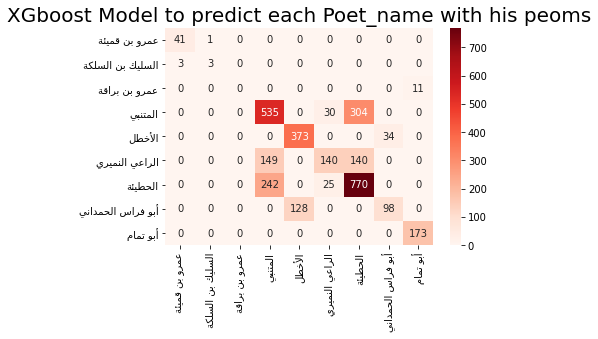

In [103]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_val, y_pred)

class_label =['عمرو بنِ قُمَيئَة', 'السُليَك بن السَلَكَة', 'عمرو بن بَرّاقَة', 'المُتَنَبّي', 'الأَخطَل', 'الراعي النُمَيري', 'الحُطَيئَة','أبو فِراس الحَمَداني', 'أَبو تَمّام']
reshaped_label = [get_display( arabic_reshaper.reshape(poet)) for poet in class_label]
#get_display( arabic_reshaper.reshape(class_label))
df_cm = pd.DataFrame(cm, index = reshaped_label, columns = reshaped_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap='Reds')
plt.title('XGboost Model to predict each Poet_name with his peoms', fontsize = 20);

# Experiment 4: Define a function to experiment multi-Classification Models

In [104]:
def testModel(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = model()
    model.fit(X_train,y_train)
    modelName = type(model).__name__
    pred=model.predict(X_test)
    print(modelName)
    print(classification_report(y_test,model.predict(X_test)))
    score=np.mean(cross_val_score(model, X, y, cv=5))

    return model,{"models":modelName,"scores":score}

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

testModel(RandomForestClassifier,new_df,y_train_val)

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.67      0.80         6
           2       1.00      0.14      0.25         7
           3       0.58      0.65      0.61       910
           4       0.74      0.85      0.79       396
           5       0.58      0.41      0.48       423
           6       0.65      0.65      0.65      1027
           7       0.64      0.47      0.54       226
           8       0.96      1.00      0.98       169

    accuracy                           0.65      3200
   macro avg       0.79      0.65      0.68      3200
weighted avg       0.65      0.65      0.65      3200



(RandomForestClassifier(),
 {'models': 'RandomForestClassifier', 'scores': 0.6554375})

In [106]:
from sklearn.naive_bayes import MultinomialNB
testModel(MultinomialNB,new_df,y_train_val)

MultinomialNB
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        36
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         7
           3       0.50      0.61      0.55       910
           4       0.77      0.57      0.65       396
           5       0.55      0.31      0.40       423
           6       0.55      0.68      0.61      1027
           7       0.90      0.25      0.39       226
           8       0.95      1.00      0.98       169

    accuracy                           0.59      3200
   macro avg       0.57      0.48      0.50      3200
weighted avg       0.61      0.59      0.57      3200



(MultinomialNB(), {'models': 'MultinomialNB', 'scores': 0.59025})

In [ ]:
from sklearn.linear_model import SGDClassifier
testModel(SGDClassifier,new_df,y_train_val)

# Comparison all of classification algorithms Results

In [107]:
#!pip install PrettyTable
from prettytable import PrettyTable

In [108]:
X = PrettyTable()
print('\n')
print("Comparison all classification algorithms scores\n")
X.field_names = ["Model", "Accuracy"]

X.add_row(["Logistic Regression Algorithm", round(lr_1,2)])
X.add_row(["Decision Tree Algorithm", round(dt_1,2)])
X.add_row(["Random Forst Algorithm",  round(rf_1,2)])
X.add_row(["Xgboost Algorithm", round(xgbc_1,2)])


print(X)
print('\n')



Comparison all classification algorithms scores

+-------------------------------+----------+
|             Model             | Accuracy |
+-------------------------------+----------+
| Logistic Regression Algorithm |   0.64   |
|    Decision Tree Algorithm    |   0.37   |
|     Random Forst Algorithm    |   0.41   |
|       Xgboost Algorithm       |   0.67   |
+-------------------------------+----------+




# NLP -Unsupervised ML algorithms

In [109]:
text =df.verse.values

In [110]:
#need this for WordCloud
#pip install --user fonttools

In [111]:
stop_words = stopwords.words('arabic')
stop_words.extend(['هـ', 'د', 'م', 'الى', 'ان', 'اذ', 'لهذه', 'قال', 'وقال', 'اكد', 'عدد', 'بعدد', 'وعدد'
                  , 'والتي', 'بن', 'بنت', 'وقد', 'ا', 'عبر', 'خلال', 'او', 'الا', 'وان', 'اي', 'بان', 'كان'
                 'و' ,'من', 'كانت' ,'تم','الف','مليون', 'وفي', 'وقد','اكثر','اقل', 'انه','وانه', 'قالت', 'وقالت', 'وتم','على','عن','حتى','اذا','وانت','ولم','منهم','عنه','ولقد'])

In [112]:
print(len(stop_words))

803


In [113]:
listToStr = ' '.join([str(elem) for elem in stop_words]) 

In [114]:
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [ ]:
#stop_words

In [115]:
text=pd.Series(text).apply(lambda x: ' '.join([word for word in x.split() if word not in (listToStr)]))
text=pd.Series(text).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

text

0                   خليلي تستعجلا تزودا تجمعا شملي وتنتظرا
1              لبث يوما بسابق مغنم سرعتي يوما بسابقه الردي
2              تنظراني اليوم اقض لبانه وتستوجبا منا وتحمدا
3                      لعمرك بجد رشيده تؤامرني لاصرم مرثدا
4                   ظهرت قوارص جمه وافرع لومي مرارا واصعدا
                               ...                        
19995                    انشئت للمكرمات سحابه ايديهم تتدفق
19996    انظر فحيث تري السيوف لوامعا ابدا ففوق رؤوسهم ت...
19997             شوس خفقت عقاب لوائهم ظلت قلوب الموت تخفق
19998           بله لبسوا الحديد حسبتهم يحسبوا المنيه تخلق
19999                  ابن ترنا فالصدا بمهذب العقيان يتعلق
Length: 20000, dtype: object

In [116]:
def deNoise(text):
    noise = re.compile(""" ّ      | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    return text

In [117]:
text = text.apply(deNoise)
text

0                   خليلي تستعجلا تزودا تجمعا شملي وتنتظرا
1              لبث يوما بسابق مغنم سرعتي يوما بسابقه الردي
2              تنظراني اليوم اقض لبانه وتستوجبا منا وتحمدا
3                      لعمرك بجد رشيده تؤامرني لاصرم مرثدا
4                   ظهرت قوارص جمه وافرع لومي مرارا واصعدا
                               ...                        
19995                    انشئت للمكرمات سحابه ايديهم تتدفق
19996    انظر فحيث تري السيوف لوامعا ابدا ففوق رؤوسهم ت...
19997             شوس خفقت عقاب لوائهم ظلت قلوب الموت تخفق
19998           بله لبسوا الحديد حسبتهم يحسبوا المنيه تخلق
19999                  ابن ترنا فالصدا بمهذب العقيان يتعلق
Length: 20000, dtype: object

# Tokenization

In [118]:
#Sentence Tokenization
data = list(df['verse'].tolist())
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:3])

[['خليلي', 'تستعجلا', 'تزودا', 'تجمعا', 'شملي', 'وتنتظرا'], ['فما', 'لبث', 'يوما', 'بسابق', 'مغنم', 'سرعتي', 'يوما', 'بسابقه', 'الردي'], ['تنظراني', 'اليوم', 'اقض', 'لبانه', 'وتستوجبا', 'منا', 'علي', 'وتحمدا']]


# Regular Expression Tokenizers
A RegexpTokenizer splits a string into substrings using a regular expression. For example, the following tokenizer forms tokens out of alphabetic sequences

In [119]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
text1= text.apply(tokenizer.tokenize)

In [120]:
text.head()

0         خليلي تستعجلا تزودا تجمعا شملي وتنتظرا
1    لبث يوما بسابق مغنم سرعتي يوما بسابقه الردي
2    تنظراني اليوم اقض لبانه وتستوجبا منا وتحمدا
3            لعمرك بجد رشيده تؤامرني لاصرم مرثدا
4         ظهرت قوارص جمه وافرع لومي مرارا واصعدا
dtype: object

# Stemming & Bigrams

In [121]:
#stemming as experiment
def apply_stemming_and_Stopwords(texts):
    st = ISRIStemmer()
    return [[st.stem(word) for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [122]:
stemmstop_word=apply_stemming_and_Stopwords(data_words)
stemmstop_word

[['خلل', 'عجل', 'تزد', 'جمع', 'شمل', 'نظر'],
 ['فما', 'لبث', 'يوم', 'سبق', 'غنم', 'سرع', 'يوم', 'سبق', 'ردي'],
 ['نظر', 'اليوم', 'اقض', 'لبن', 'وتستوجبا', 'منا', 'علي', 'حمد'],
 ['عمر', 'بجد', 'رشد', 'ومر', 'صرم', 'رثد'],
 ['ظهر', 'قرص', 'جمه', 'فرع', 'لوم', 'ررا', 'صعد'],
 ['علي', 'ذنب', 'اكن', 'جنت', 'سوي', 'قول', 'باغ', 'كاد', 'جهد'],
 ['عمر', 'نعم', 'مرء', 'دعو', 'حبل', 'ندي', 'قمه', 'ندد'],
 ['عظم', 'رمد', 'قدر', 'تعبس', 'ويس', 'وقد'],
 ['صرح', 'كحل', 'وهب', 'عره', 'ريح', 'تتر', 'لذي', 'مال', 'رفد'],
 ['صبر', 'علي', 'وطء', 'ولي', 'حطم', 'ضن', 'قرب', 'علي', 'خمد'],
 ['يحم', 'فرج', 'الح', 'حفظ', 'كرم', 'حيا', 'اجد', 'حرد'],
 ['اري', 'جرت', 'خفت', 'وخف', 'نصح', 'وحب', 'نوي', 'طمح'],
 ['فبي', 'علي', 'نجم', 'شخس', 'نحس', 'اشم', 'طير', 'زجر', 'سنح'],
 ['فان', 'شغب', 'شغب', 'مني', 'سجه', 'شيم', 'يوت', 'سجح'],
 ['قرض', 'اقا', 'فوف', 'قرض', 'وعف', 'ارد', 'نفس', 'شحح'],
 ['علي', 'قوم', 'شقذو', 'صبح', 'دير', 'برض', 'دان', 'نبح'],
 ['نفذ', 'نفذ', 'فسن', 'ضمر', 'اضغ', 'علي', 'كشح'],
 ['فقل', '

In [ ]:
# after tokenization we want to represent our data by drawing WordCloud,in this case we should convert the data list to string
text_list_str= ' '.join([str(elem) for elem in text]) 

In [123]:
comment_words=''
for words in text: 
    comment_words = comment_words + words + ' '
reshaped_text = arabic_reshaper.reshape(comment_words)
bidi_text = get_display(reshaped_text)

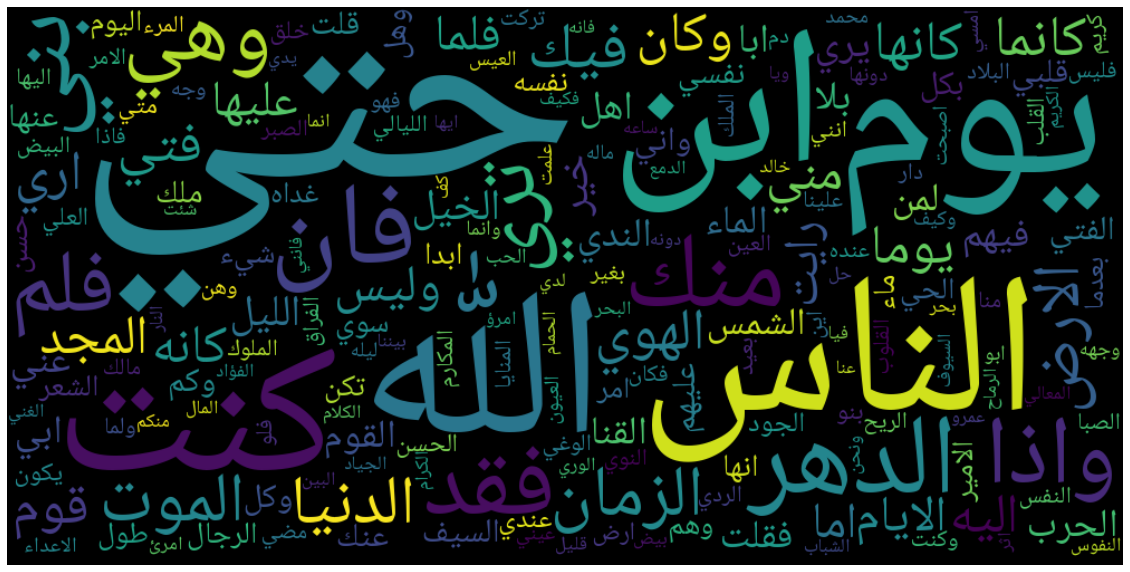

In [124]:
from wordcloud import WordCloud

font_file = 'NotoNaskhArabic-Regular.ttf'
wordcloud = WordCloud(width = 1000, height = 500,min_font_size = 10,font_path=font_file).generate(bidi_text)
wordcloud.to_file("arabic_example13.png")
#<wordcloud.wordcloud.WordCloud at 0x1ca1b4a9550>
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Poems text information

In [158]:
all_words = [word for tokens in text1 for word in tokens]
sentence_lengths = [len(tokens) for tokens in text1]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

140045 words total, with a vocabulary size of 55490
Max sentence length is 13


# top 20 words in poems

In [159]:
from collections import Counter 
counter = Counter(all_words)

In [160]:
counter.most_common(25)


[('حتي', 796),
 ('الله', 387),
 ('يوم', 333),
 ('ابن', 323),
 ('الناس', 291),
 ('بني', 275),
 ('كنت', 258),
 ('الدهر', 254),
 ('فان', 248),
 ('منك', 207),
 ('فقد', 193),
 ('فلم', 173),
 ('تري', 170),
 ('واذا', 167),
 ('الزمان', 167),
 ('وهي', 167),
 ('الموت', 155),
 ('ابا', 149),
 ('ابي', 147),
 ('الدنيا', 144),
 ('الارض', 140),
 ('كانما', 139),
 ('الهوي', 136),
 ('فيك', 135),
 ('فتي', 128)]

# K-mean Model

In [ ]:
?TfidfVectorizer

In [131]:
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

In [132]:
documents = text
vectorizer = TfidfVectorizer(stop_words=arb_stopwords, max_df=8, min_df=2)
x = vectorizer.fit_transform(documents)

In [133]:
x.shape

(20000, 16546)

In [134]:
x

<20000x16546 sparse matrix of type '<class 'numpy.float64'>'
	with 52408 stored elements in Compressed Sparse Row format>

In [137]:
seed = 0
wcss = [] #Within cluster sum squares
for i in range(1,20):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(x)
    wcss.append(km.inertia_)

In [138]:
wcss

[19157.470708373898,
 19153.25552222043,
 19150.9865458424,
 19146.690547529244,
 19144.82102735983,
 19142.111791589734,
 19139.22287233038,
 19136.97536577523,
 19135.042566195974,
 19130.824739803233,
 19129.02651163413,
 19125.01965696422,
 19124.51664374959,
 19119.18382689148,
 19116.915783213724,
 19114.875692118327,
 19114.031313961055,
 19110.059576592714,
 19106.787573147827]

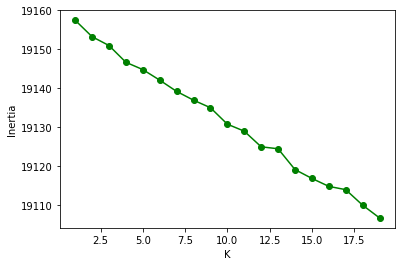

In [139]:
plt.plot(range(1,20), wcss, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Inertia");

In [140]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters = 13)
km.fit(x)
silhouette_score(x, km.labels_)

0.014047302494397451

In [143]:
sil_scores = [] 
for i in range(2,20):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(x)
    sil_scores.append(silhouette_score(x, km.labels_))

In [144]:
print ("Silhouette_score: ")
print (sil_scores)

Silhouette_score: 
[0.01370902031289382, 0.013654514473171162, 0.013758213929849756, 0.013793950254703324, 0.013618671477891238, 0.01135009129053134, 0.006671904448755351, 0.002452888426300249, 0.012965696622667567, 0.002342728511792193, 0.014054863816768327, 0.002494617762695317, 0.0026139561507748754, 0.013666721713782781, 0.013633234827809992, 0.0025675704600832574, 0.002649389124759006, 0.0027155742314756877]


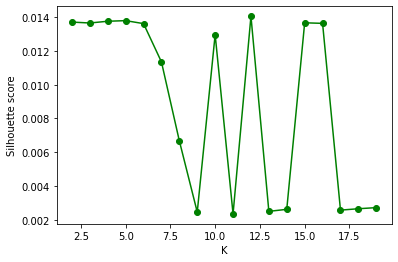

In [146]:
plt.plot(range(2,20), sil_scores, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")

plt.ylabel("Silhouette score");

In [147]:
df['cluster'] = km.labels_
df.sample(10)

,poem_id,Generation,poet_name,divan,rhyme,poem_type,left_side,right_side,verse,cluster
6873,6873,الأموي,الأَخطَل,الديوان الرئيسي,ر,الوافر,مِنَ الغاراتِ وَالغَزوِ اِقوِرارُ,شَوازِبَ كَالقَنا قَد كانَ فيها,شوازب كالقنا الغارات والغزو اقورار,0
4498,4498,العباسي,المُتَنَبّي,الديوان الرئيسي,م,البسيط,وَيَكرَهُ اللَهُ ما تَأتونَ وَالكَرَمُ,كَم تَطلُبونَ لَنا عَيباً فَيُعجِزُكُم,تطلبون عيبا فيعجزكم ويكره الله تاتون والكرم,5
1061,1061,العباسي,المُتَنَبّي,الديوان الرئيسي,ب,الطويل,وَأَينَ مِنَ المُشتاقِ عَنقاءُ مُغرِبُ,أَحِنُّ إِلى أَهلي وَأَهوى لِقاءَهُم,احن الي اهلي واهوي لقاءهم واين المشتاق عنقاء مغرب,4
16814,16814,العباسي,أَبو تَمّام,الديوان الرئيسي,ق,الخفيف,جاكَ بَينَ الحَشا وَبَينَ التَراقي,لَو تَطَلَّعتَ في وِدادي إِذاً فا,تطلعت ودادي فا جاك الحشا وبين التراقي,4
3584,3584,العباسي,المُتَنَبّي,الديوان الرئيسي,ل,الطويل,فَأَنتِ لِخَيرِ الفاخِرينَ قَبيلُ,فَتيهاً وَفَخراً تَغلِبَ اِبنَةَ وائِلٍ,فتيها وفخرا تغلب ابنه وائل فانت لخير الفاخرين ...,4
9015,9015,الأموي,الراعي النُمَيري,الديوان الرئيسي,د,الطويل,مَذاخِرُها وَاِزدادَ رَشحاً وَريدُها,فَلَمّا سَقَيناها العَكيسَ تَمَلَّأَت,فلما سقيناها العكيس تملات مذاخرها وازداد رشحا ...,5
12161,12161,العباسي,أبو فِراس الحَمَداني,الديوان الرئيسي,ر,الطويل,رَجَعتُ إِلى صَبرٍ أَمَرَّ مِنَ الصَبرِ,بَكَيتُ فَلَمّا لَم أَرَ الدَمعَ نافِعي,بكيت فلما ار الدمع نافعي رجعت الي امر الصبر,5
20065,20065,العباسي,أَبو تَمّام,الديوان الرئيسي,ض,الكامل,وَيَفوتُ بَسطَكَ في المَكارِمِ قَبضُهُ,يَغتالُ بَذلَكَ كُلَّهُ إِمساكُهُ,يغتال بذلك كله امساكه ويفوت بسطك المكارم قبضه,5
2135,2135,العباسي,المُتَنَبّي,الديوان الرئيسي,ر,الوافر,فَخافوا أَن يَصيروا حَيثُ صاروا,وَكانَ بَنو كِلابٍ حَيثُ كَعبٌ,وكان بنو كلاب كعب فخافوا يصيروا صاروا,5
6404,6404,الأموي,الأَخطَل,الديوان الرئيسي,ل,البسيط,بَحّاءُ تَسمَعُ في تَرجيعِها صَحَلا,وَقَد أَكونُ عَميدَ الشَربِ تُسمِعُنا,اكون عميد الشرب تسمعنا بحاء تسمع ترجيعها صحلا,4


In [ ]:
# km = KMeans(n_clusters = 5, random_state=seed)
# km.fit(x)

# plt.figure(figsize=(10,5))
# draw = sns.rugplot(x= x, c= km.labels_)

# plt.legend(handles=draw.legend_elements()[0] , labels=[0, 1, 2, 3, 4]);

In [150]:
k =12
model = KMeans(n_clusters=k, init='k-means++',random_state=60, max_iter=100, n_init=1)
model.fit(x)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),

Top terms per cluster:
Cluster 0:
 يظلم
 يغير
 اريده
 العظيم
 يحدث
 سريع
 انصرفت
 شمالا
 فرح
 يمينا
 ذنبا
 اسيرا
 البيضاء
 عمنا
 جفوني
Cluster 1:
 نجده
 للاسلام
 احييت
 مسكون
 شغب
 للشعراء
 خراب
 النجد
 نطاف
 هيق
 فساد
 الرشد
 بنائل
 زلال
 الخرق
Cluster 2:
 فرع
 تكرم
 طاب
 فاق
 ليوم
 وباس
 اتري
 وعود
 مولد
 الاغراس
 النضر
 الذرا
 متخذا
 والتذ
 صنائع
Cluster 3:
 يحملن
 السربال
 مدجج
 منخرق
 مهاه
 شواردا
 للشرب
 مقرب
 نطف
 فقدنا
 ووالله
 الاشاعر
 بالدماء
 خميص
 يقلص
Cluster 4:
 الايدي
 لامرئ
 الضلال
 مالكا
 قدمت
 دان
 محرم
 ضربه
 الغصن
 رجله
 كسب
 القتيل
 فخرا
 نقص
 كشف
Cluster 5:
 واضحي
 الحميه
 ساحاتهم
 تضام
 موردا
 عشيرتي
 ضلالا
 سورته
 نائما
 عجاف
 بالحلم
 ومات
 يهاب
 مذاهبه
 جوار
Cluster 6:
 اليد
 وترمي
 قومنا
 يطوي
 ازري
 يفضل
 المعاقل
 تفتدوا
 تفتدوني
 الشارب
 صقالا
 الغيوب
 صقل
 ذبابا
 بعينيها
Cluster 7:
 جزعا
 انفا
 يقدر
 شابه
 امت
 اظهرت
 غيداء
 انفت
 يابن
 المسكين
 شعرا
 لفقدك
 جامح
 يغادر
 خلع
Cluster 8:
 اربي
 ظلا
 شغلت
 خيالا
 قضاعه
 السلام
 عليل
 استطعت
 الدهور
 فاضحي
 مطل

# Topic Modeling

# sooner